In [2]:
#load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load PRM_L2 dataset
df = pd.read_csv('PRM_L2.csv')

count    128.000000
mean      61.562500
std       44.571053
min        1.000000
25%        1.750000
50%       79.500000
75%       97.000000
max      132.000000
Name: count, dtype: float64


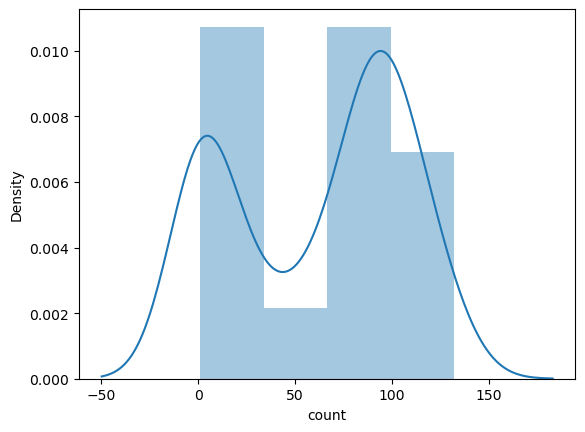

In [4]:
#check in how many matches each referee has been involved
df["Referee"].value_counts()
#show median and mean of matches per referee
print(df["Referee"].value_counts().describe())
#show kde plot of matches per referee
# sns.kdeplot(df["Referee"].value_counts())
# plt.show()
#show histogram of matches per referee
sns.distplot(df["Referee"].value_counts())
plt.show()

In [5]:
#split data into five datasets: for level PRM, CHA, L1, L2, and other than PRM
df_PRM = df[df["Level"] == "PRM"]
df_CHA = df[df["Level"] == "CHA"]
df_L1 = df[df["Level"] == "L1"]
df_L2 = df[df["Level"] == "L2"]
df_other = df[df["Level"] != "PRM"]

In [6]:
#show number of referees in each dataset
print(len(df_PRM["Referee"].unique()))
print(len(df_CHA["Referee"].unique()))
print(len(df_L1["Referee"].unique()))
print(len(df_L2["Referee"].unique()))
print(len(df_other["Referee"].unique()))

31
61
85
98
124


In [19]:
#for each datasets show kde plot of matches per referee with titles, show median 
# sns.kdeplot(df_PRM["Referee"].value_counts())
# plt.title("PRM")
# plt.show()
# sns.kdeplot(df_CHA["Referee"].value_counts())
# plt.title("CHA")
# plt.show()
# sns.kdeplot(df_L1["Referee"].value_counts())
# plt.title("L1")
# plt.show()
# sns.kdeplot(df_L2["Referee"].value_counts())
# plt.title("L2")
# plt.show()
# sns.kdeplot(df_other["Referee"].value_counts())
# plt.title("Other")
# plt.show()

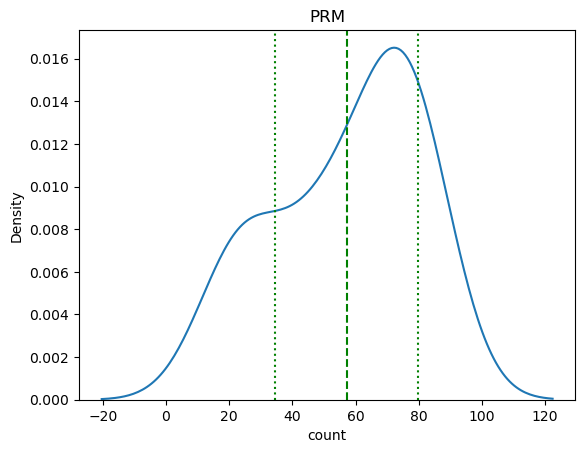

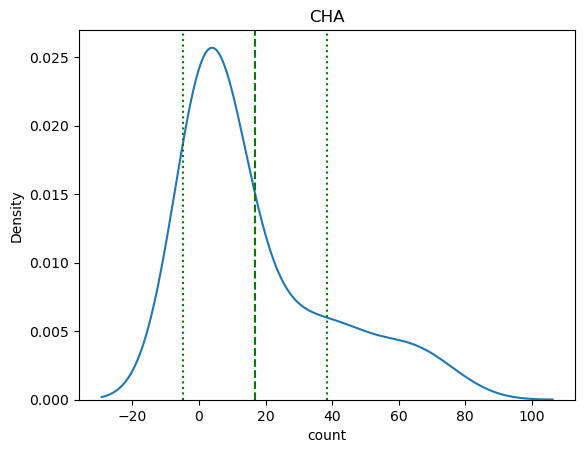

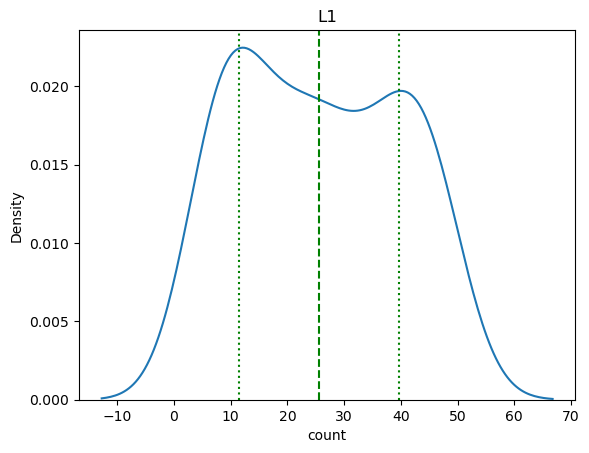

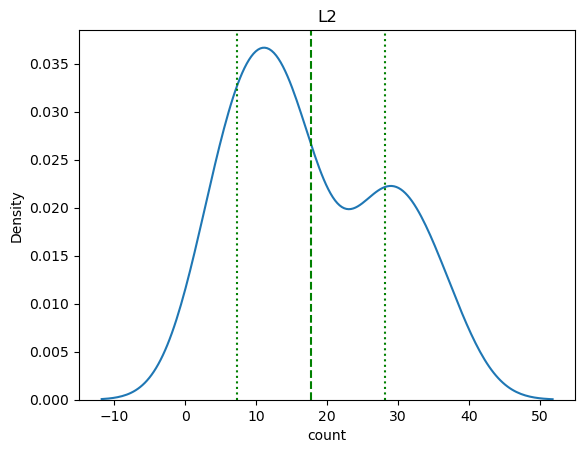

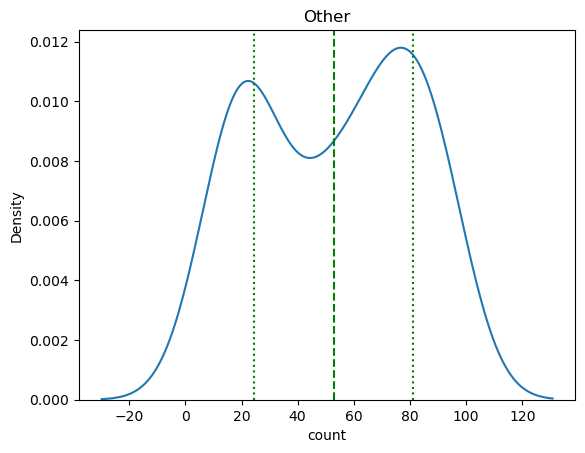

In [18]:
#for each datasets show kde plot of matches per referee with titles, show mean on the plot, show value of mean-std and mean+std
sns.kdeplot(df_PRM["Referee"].value_counts())
plt.title("PRM")
plt.axvline(df_PRM["Referee"].value_counts().mean(), color='g', linestyle='--')
plt.axvline(df_PRM["Referee"].value_counts().mean()-df_PRM["Referee"].value_counts().std(), color='g', linestyle=':')
plt.axvline(df_PRM["Referee"].value_counts().mean()+df_PRM["Referee"].value_counts().std(), color='g', linestyle=':')
plt.show()
sns.kdeplot(df_CHA["Referee"].value_counts())
plt.title("CHA")
plt.axvline(df_CHA["Referee"].value_counts().mean(), color='g', linestyle='--')
plt.axvline(df_CHA["Referee"].value_counts().mean()-df_CHA["Referee"].value_counts().std(), color='g', linestyle=':')
plt.axvline(df_CHA["Referee"].value_counts().mean()+df_CHA["Referee"].value_counts().std(), color='g', linestyle=':')
plt.show()
sns.kdeplot(df_L1["Referee"].value_counts())
plt.title("L1")
plt.axvline(df_L1["Referee"].value_counts().mean(), color='g', linestyle='--')
plt.axvline(df_L1["Referee"].value_counts().mean()-df_L1["Referee"].value_counts().std(), color='g', linestyle=':')
plt.axvline(df_L1["Referee"].value_counts().mean()+df_L1["Referee"].value_counts().std(), color='g', linestyle=':')
plt.show()
sns.kdeplot(df_L2["Referee"].value_counts())
plt.title("L2")
plt.axvline(df_L2["Referee"].value_counts().mean(), color='g', linestyle='--')
plt.axvline(df_L2["Referee"].value_counts().mean()-df_L2["Referee"].value_counts().std(), color='g', linestyle=':')
plt.axvline(df_L2["Referee"].value_counts().mean()+df_L2["Referee"].value_counts().std(), color='g', linestyle=':')
plt.show()
sns.kdeplot(df_other["Referee"].value_counts())
plt.title("Other")
plt.axvline(df_other["Referee"].value_counts().mean(), color='g', linestyle='--')
plt.axvline(df_other["Referee"].value_counts().mean()-df_other["Referee"].value_counts().std(), color='g', linestyle=':')
plt.axvline(df_other["Referee"].value_counts().mean()+df_other["Referee"].value_counts().std(), color='g', linestyle=':')
plt.show()


In [9]:
#calculate mean-std and mean+std for each group
#PRM
mean_PRM = df_PRM["Referee"].value_counts().mean()
std_PRM = df_PRM["Referee"].value_counts().std()
#CHA
mean_CHA = df_CHA["Referee"].value_counts().mean()
std_CHA = df_CHA["Referee"].value_counts().std()
#L1
mean_L1 = df_L1["Referee"].value_counts().mean()
std_L1 = df_L1["Referee"].value_counts().std()
#L2
mean_L2 = df_L2["Referee"].value_counts().mean()
std_L2 = df_L2["Referee"].value_counts().std()
#other
mean_other = df_other["Referee"].value_counts().mean()
std_other = df_other["Referee"].value_counts().std()


In [10]:
#for each group choose data of referees who have been involved in number of matches between one std below and above mean
#PRM
df_PRM = df_PRM[df_PRM["Referee"].isin(df_PRM["Referee"].value_counts()[(df_PRM["Referee"].value_counts() > mean_PRM-1*std_PRM) & (df_PRM["Referee"].value_counts() < mean_PRM+1*std_PRM)].index)]
#CHA
df_CHA = df_CHA[df_CHA["Referee"].isin(df_CHA["Referee"].value_counts()[(df_CHA["Referee"].value_counts() > mean_CHA-1*std_CHA) & (df_CHA["Referee"].value_counts() < mean_CHA+1*std_CHA)].index)]
#L1
df_L1 = df_L1[df_L1["Referee"].isin(df_L1["Referee"].value_counts()[(df_L1["Referee"].value_counts() > mean_L1-1*std_L1) & (df_L1["Referee"].value_counts() < mean_L1+1*mean_L1)].index)]
#L2
df_L2 = df_L2[df_L2["Referee"].isin(df_L2["Referee"].value_counts()[(df_L2["Referee"].value_counts() > mean_L2-1*std_L2) & (df_L2["Referee"].value_counts() < mean_L2+1*std_L2)].index)]
#other
df_other = df_other[df_other["Referee"].isin(df_other["Referee"].value_counts()[(df_other["Referee"].value_counts() > mean_other-1*std_other) & (df_other["Referee"].value_counts() < mean_other+1*std_other)].index)]


In [11]:
#show how many referees are left in each group
print(len(df_PRM["Referee"].unique()))
print(len(df_CHA["Referee"].unique()))
print(len(df_L1["Referee"].unique()))
print(len(df_L2["Referee"].unique()))
print(len(df_other["Referee"].unique()))

17
47
58
43
57
